In [4]:
# Create a violin plot to show NDVI distribution across SPI categories

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is already defined, use a sample binning for SPI classes
def create_spi_ndvi_violinplot(df, region_name, save_dir=None):
    # Classify SPI into bins
    df = df.copy()
    df['SPI_Class'] = pd.cut(df['SPI'],
                             bins=[-np.inf, -1.5, -1, -0.5, 0, 0.5, 1, np.inf],
                             labels=['Extreme Drought', 'Severe Drought', 'Moderate Drought',
                                     'Mild Drought', 'Near Normal', 'Wet', 'Very Wet'])

    # Violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df, x='SPI_Class', y='NDVI', inner='quartile', palette='YlGnBu')
    plt.title(f'{region_name} – NDVI Distribution by SPI Class')
    plt.xlabel('SPI Class')
    plt.ylabel('NDVI')
    plt.xticks(rotation=15)
    plt.grid(True)
    plt.tight_layout()
    
    if save_dir:
        plt.savefig(f"{save_dir}/{region_name}_ndvi_violinplot.png")
    plt.show()

    return df  # Return modified DataFrame in case it's reused

# You can now call this function by passing the merged df, region name and save directory (if needed)
# Example: create_spi_ndvi_violinplot(df, "Cape_York_Peninsula", "Results/Recovery_Analysis")



In [5]:
# Re-import necessary libraries after code execution environment reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Redefine the violin plot function after kernel reset
def create_spi_ndvi_violinplot(df, region_name, save_dir=None):
    # Classify SPI into bins
    df = df.copy()
    df['SPI_Class'] = pd.cut(df['SPI'],
                             bins=[-np.inf, -1.5, -1, -0.5, 0, 0.5, 1, np.inf],
                             labels=['Extreme Drought', 'Severe Drought', 'Moderate Drought',
                                     'Mild Drought', 'Near Normal', 'Wet', 'Very Wet'])

    # Violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df, x='SPI_Class', y='NDVI', inner='quartile', palette='YlGnBu')
    plt.title(f'{region_name} – NDVI Distribution by SPI Class')
    plt.xlabel('SPI Class')
    plt.ylabel('NDVI')
    plt.xticks(rotation=15)
    plt.grid(True)
    plt.tight_layout()
    
    if save_dir:
        plt.savefig(f"{save_dir}/{region_name}_ndvi_violinplot.png")
    plt.show()

    return df  # Return modified DataFrame in case it's reused


/var/folders/sj/0lwb59cd0px29vvpktccpgrm0000gn/T/ipykernel_36488/1749067613.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='SPI_Class', y='NDVI', inner='quartile', palette='YlGnBu')


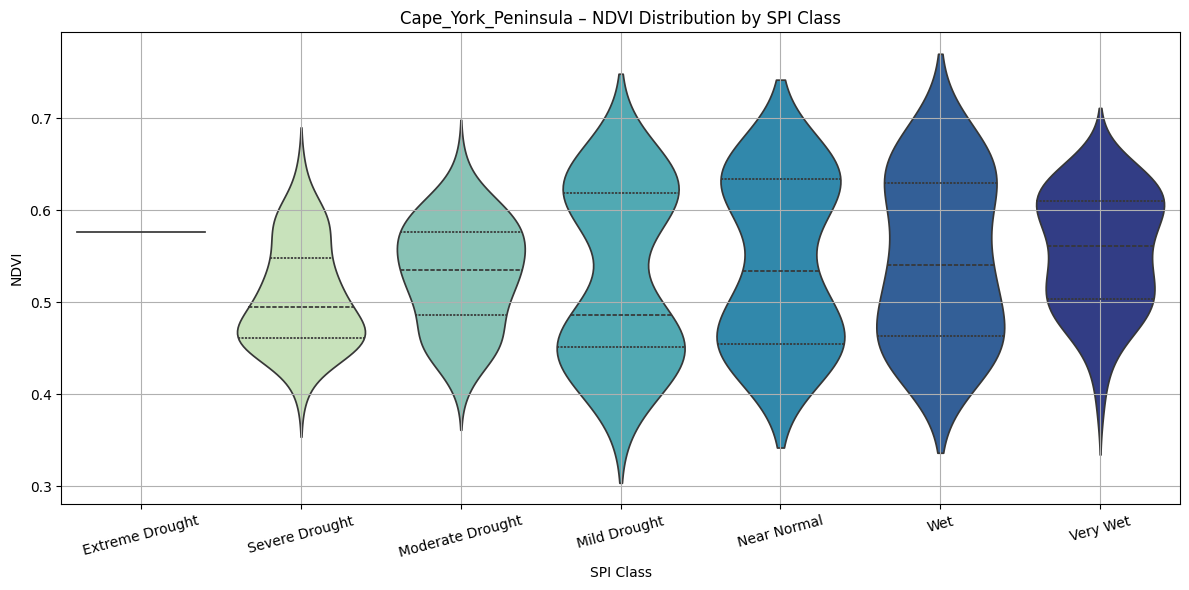

,Date,SPI,NDVI,SPI_Class
0,2001-01-01,1.040672,0.592621,Very Wet
1,2001-02-01,1.674442,0.520318,Very Wet
2,2001-03-01,1.016681,0.612818,Very Wet
3,2001-04-01,0.192899,0.644443,Near Normal
4,2001-05-01,-1.026615,0.598362,Severe Drought
...,...,...,...,...
261,2022-10-01,-0.473493,0.511024,Mild Drought
262,2022-11-01,0.327277,0.513585,Near Normal
263,2022-12-01,1.086743,0.486150,Very Wet
264,2023-01-01,1.481967,0.526334,Very Wet


In [6]:
import numpy as np

# Assuming you already loaded a merged SPI+NDVI dataframe for a region (e.g., Cape York Peninsula)
df = pd.read_csv("Figures/SPI vs NDVI/Cape_York_Peninsula/Cape_York_Peninsula_merged_spi_ndvi.csv")

create_spi_ndvi_violinplot(df, region_name="Cape_York_Peninsula", save_dir="Figures/Violin")


This visualization helps clearly communicate:

NDVI tends to drop during drought classes
Variance increases in extreme events
Useful for publications, presentations, and supporting your recovery rules!

/var/folders/sj/0lwb59cd0px29vvpktccpgrm0000gn/T/ipykernel_36488/2884944406.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='SPI_Class', y='NDVI', bw_adjust=0.6, cut=1, linewidth=1.2, palette="Set2")


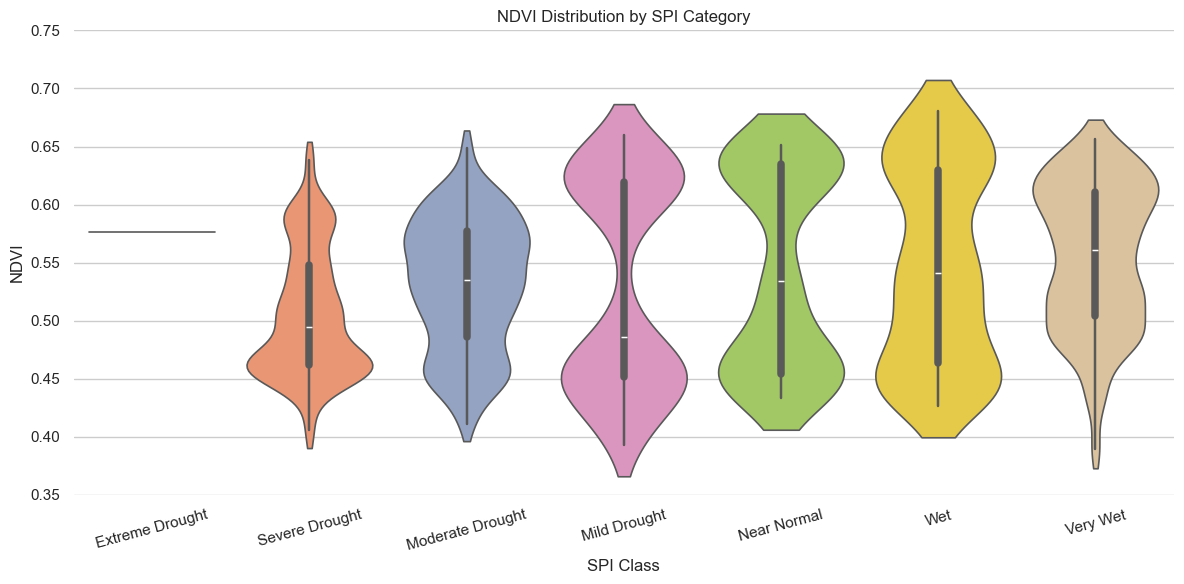

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Make sure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create SPI categories
df['SPI_Class'] = pd.cut(df['SPI'],
                         bins=[-float('inf'), -1.5, -1, -0.5, 0, 0.5, 1, float('inf')],
                         labels=['Extreme Drought', 'Severe Drought', 'Moderate Drought',
                                 'Mild Drought', 'Near Normal', 'Wet', 'Very Wet'])

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Draw violin plot with custom bandwidth and color palette
sns.violinplot(data=df, x='SPI_Class', y='NDVI', bw_adjust=0.6, cut=1, linewidth=1.2, palette="Set2")

# Final touches
plt.title("NDVI Distribution by SPI Category")
plt.xlabel("SPI Class")
plt.ylabel("NDVI")
plt.xticks(rotation=15)
ax.set(ylim=(0.35, 0.75))  # Adjust as needed based on your NDVI range
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()
